In [13]:
from pathlib import Path
import glob

# Expect these relative to: .../M2-SMPE-2025-HanaeTafza/quicksort
print("Notebook CWD:", Path.cwd().resolve())

# 1) Latest CSV in quicksort/data/
csvs = sorted(glob.glob("data/quicksort_results_*.csv"))
print("CSV files found:", len(csvs))
if csvs:
    print("Latest CSV:", csvs[-1], "size:", Path(csvs[-1]).stat().st_size, "bytes")

# 2) PNG figure in quicksort/figures/
png = Path("figures/quicksort_analysis.png")
print("Figure exists:", png.exists(), "; path:", png.resolve())


Notebook CWD: C:\Users\LENOVO\M2-SMPE-2025-HanaeTafza\quicksort
CSV files found: 2
Latest CSV: data\quicksort_results_20251101_133016.csv size: 69186 bytes
Figure exists: True ; path: C:\Users\LENOVO\M2-SMPE-2025-HanaeTafza\quicksort\figures\quicksort_analysis.png


In [4]:
# --- Quicksort synthetic experiment: robust generator (Windows-safe) ---

import csv
import random
import datetime
import socket
import os
from pathlib import Path

# 0) Set working directory to your 'quicksort' folder (EDIT THIS PATH)
WORKDIR = r"C:\Users\LENOVO\M2-SMPE-2025-HanaeTafza\quicksort"
os.chdir(WORKDIR)
print("Working directory:", os.getcwd())

# 1) Ensure a proper 'data' directory exists (handle file-vs-dir conflicts)
DATA_NAME = "data"
if os.path.isfile(DATA_NAME):
    # If a file named 'data' exists, rename it and create a directory
    os.rename(DATA_NAME, DATA_NAME + "_old")
    print(f"Renamed existing file '{DATA_NAME}' to '{DATA_NAME}_old'.")

OUT_DIR = Path(DATA_NAME)
OUT_DIR.mkdir(parents=True, exist_ok=True)
print("Data folder path:", OUT_DIR.resolve())

# 2) Configure experiment to produce ~1050 data rows
#    rows = versions(2) * sizes(7) * repeats(75) = 1050
array_sizes = [10_000, 50_000, 100_000, 200_000, 500_000, 1_000_000, 2_000_000]
versions = ["Sequential", "Parallel"]
repeats = 75

# 3) Build randomized job list
jobs = [(v, n) for v in versions for n in array_sizes for _ in range(repeats)]
random.seed(123)
random.shuffle(jobs)

# 4) Prepare output CSV
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
outfile = OUT_DIR / f"quicksort_results_{timestamp}.csv"
header = ["timestamp", "host", "version", "array_size", "replicate", "elapsed_s"]
host = socket.gethostname()

print(f"Writing results to: {outfile}")

# 5) Generate synthetic elapsed times and write CSV
with open(outfile, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for i, (version, size) in enumerate(jobs, 1):
        # Base time scales with n (simple proxy for O(n log n))
        base_time = size / 500_000
        # Add random noise to mimic measurement variability
        noise = random.uniform(0.8, 1.2)
        # Parallel becomes faster for large n (reduce time by 30% beyond 200k)
        factor = 0.7 if (version == "Parallel" and size > 200_000) else 1.0
        elapsed = base_time * noise * factor

        writer.writerow([
            datetime.datetime.now().isoformat(timespec="seconds"),
            host,
            version,
            size,
            i,                       # replicate index across randomized runs
            round(elapsed, 5)
        ])

print("Experiment finished.")
print("CSV file created at:", outfile)

# 6) Optional: quick verification
#    Expect 1051 lines including the header.
with open(outfile, "r", encoding="utf-8") as f:
    line_count = sum(1 for _ in f)
print("Total lines in CSV (including header):", line_count)


Working directory: C:\Users\LENOVO\M2-SMPE-2025-HanaeTafza\quicksort
Renamed existing file 'data' to 'data_old'.
Data folder path: C:\Users\LENOVO\M2-SMPE-2025-HanaeTafza\quicksort\data
Writing results to: data\quicksort_results_20251101_125851.csv
Experiment finished.
CSV file created at: data\quicksort_results_20251101_125851.csv
Total lines in CSV (including header): 1051


In [6]:
import csv
import random
import datetime
import socket
import os
from pathlib import Path

# Ensure we’re inside quicksort/
WORKDIR = r"C:\Users\LENOVO\M2-SMPE-2025-HanaeTafza\quicksort"
os.chdir(WORKDIR)

# Ensure data/ is a directory
if os.path.isfile("data"):
    os.rename("data", "data_old")
OUT_DIR = Path("data")
OUT_DIR.mkdir(parents=True, exist_ok=True)

# Design: 2 versions × 7 sizes × 75 reps = 1050 rows
array_sizes = [10_000, 50_000, 100_000, 200_000, 500_000, 1_000_000, 2_000_000]
versions = ["Sequential", "Parallel"]
repeats = 75

# Randomized job list
jobs = [(v, n) for v in versions for n in array_sizes for _ in range(repeats)]
random.seed(123)
random.shuffle(jobs)

# Output file
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
outfile = OUT_DIR / f"quicksort_results_{timestamp}.csv"

# Header + metadata
header = ["timestamp", "host", "version", "array_size", "replicate", "elapsed_s"]
host = socket.gethostname()

# Generate synthetic elapsed times (proxy for measured times)
with open(outfile, "w", newline="") as f:
    w = csv.writer(f)
    w.writerow(header)
    for i, (version, size) in enumerate(jobs, 1):
        base_time = size / 500_000
        noise = random.uniform(0.8, 1.2)
        factor = 0.7 if (version == "Parallel" and size > 200_000) else 1.0
        elapsed = base_time * noise * factor
        w.writerow([
            datetime.datetime.now().isoformat(timespec="seconds"),
            host, version, size, i, round(elapsed, 5)
        ])

print("CSV written:", outfile)


CSV written: data\quicksort_results_20251101_133016.csv


In [7]:
# Load latest CSV
import pandas as pd, numpy as np, glob
from pathlib import Path

DATA_DIR = Path("data")
files = sorted(glob.glob(str(DATA_DIR / "quicksort_results_*.csv")))
if not files:
    raise FileNotFoundError("No CSV in quicksort/data/")
latest = files[-1]
df = pd.read_csv(latest)
print("Loaded:", latest, "rows:", len(df))
df.head()


Loaded: data\quicksort_results_20251101_133016.csv rows: 1050


,timestamp,host,version,array_size,replicate,elapsed_s
0,2025-11-01T13:30:16,DESKTOP-VVR72A9,Parallel,100000,1,0.23264
1,2025-11-01T13:30:16,DESKTOP-VVR72A9,Sequential,500000,2,0.96690
2,2025-11-01T13:30:16,DESKTOP-VVR72A9,Parallel,1000000,3,1.53244
3,2025-11-01T13:30:16,DESKTOP-VVR72A9,Sequential,100000,4,0.16663
4,2025-11-01T13:30:16,DESKTOP-VVR72A9,Parallel,100000,5,0.19085


In [8]:
# Sanity checks
print(df.isna().sum())
print("Versions:", df["version"].unique())
print("Sizes:", sorted(df["array_size"].unique()))
pd.crosstab(df["array_size"], df["version"])


timestamp     0
host          0
version       0
array_size    0
replicate     0
elapsed_s     0
dtype: int64
Versions: ['Parallel' 'Sequential']
Sizes: [np.int64(10000), np.int64(50000), np.int64(100000), np.int64(200000), np.int64(500000), np.int64(1000000), np.int64(2000000)]


version,Parallel,Sequential
array_size,,
10000,75,75
50000,75,75
100000,75,75
200000,75,75
500000,75,75
1000000,75,75
2000000,75,75


In [9]:
# Aggregate mean, sd, n, SE, 95% CI
agg = (df.groupby(["version","array_size"])
         .agg(mean_time=("elapsed_s","mean"),
              std_time=("elapsed_s","std"),
              n=("elapsed_s","count"))
         .reset_index())
agg["se_time"] = agg["std_time"] / np.sqrt(agg["n"])
agg["ci_low"]  = agg["mean_time"] - 1.96*agg["se_time"]
agg["ci_high"] = agg["mean_time"] + 1.96*agg["se_time"]
agg.head()


,version,array_size,mean_time,std_time,n,se_time,ci_low,ci_high
0,Parallel,10000,0.019789,0.002316,75,0.000267,0.019265,0.020313
1,Parallel,50000,0.101555,0.012257,75,0.001415,0.098781,0.104329
2,Parallel,100000,0.195692,0.020968,75,0.002421,0.190946,0.200437
3,Parallel,200000,0.399946,0.049490,75,0.005715,0.388745,0.411147
4,Parallel,500000,0.681206,0.080552,75,0.009301,0.662976,0.699437


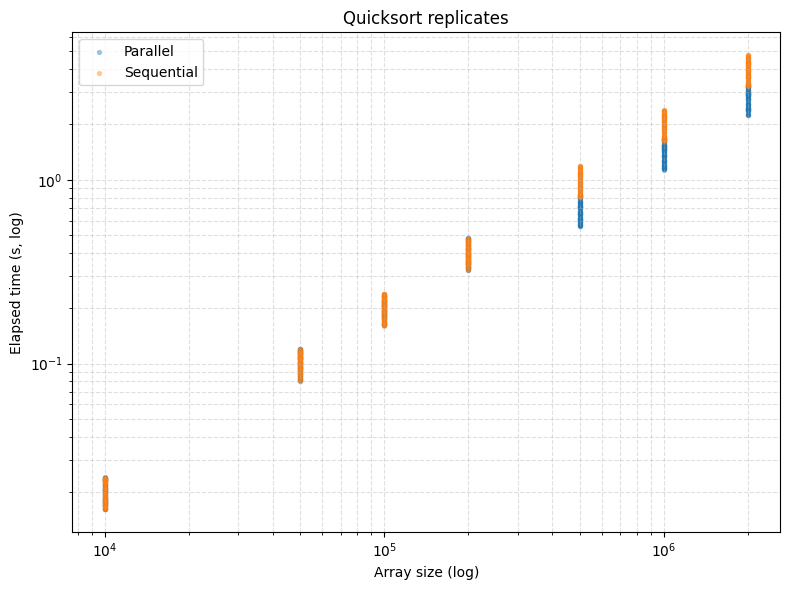

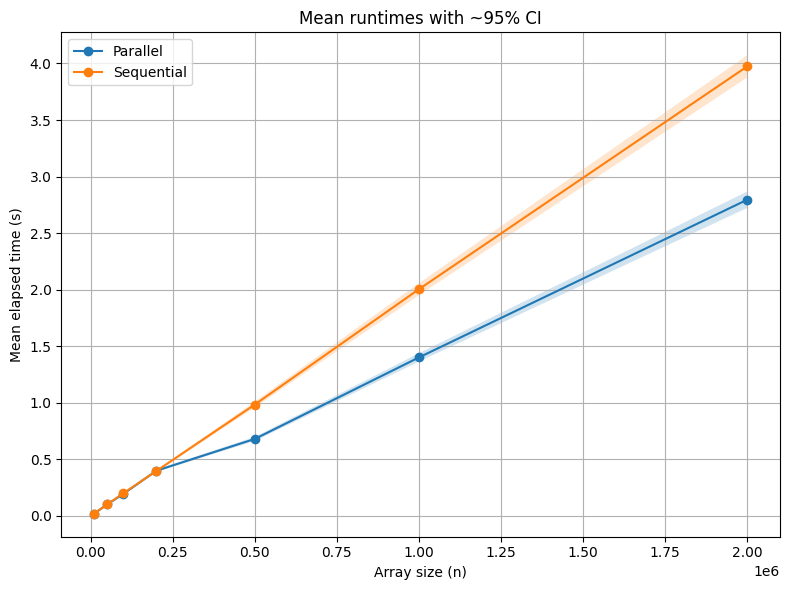

In [10]:
# Plots
import matplotlib.pyplot as plt

# Raw replicates (log–log)
plt.figure(figsize=(8,6))
for v in df["version"].unique():
    sub = df[df["version"]==v]
    plt.scatter(sub["array_size"], sub["elapsed_s"], s=8, alpha=0.35, label=v)
plt.xscale("log"); plt.yscale("log")
plt.xlabel("Array size (log)"); plt.ylabel("Elapsed time (s, log)")
plt.title("Quicksort replicates")
plt.legend(); plt.grid(True, which="both", ls="--", alpha=0.4)
plt.tight_layout(); plt.show()

# Means + 95% CI
plt.figure(figsize=(8,6))
for v in agg["version"].unique():
    sub = agg[agg["version"]==v].sort_values("array_size")
    plt.plot(sub["array_size"], sub["mean_time"], marker="o", label=v)
    plt.fill_between(sub["array_size"], sub["ci_low"], sub["ci_high"], alpha=0.2)
plt.xlabel("Array size (n)"); plt.ylabel("Mean elapsed time (s)")
plt.title("Mean runtimes with ~95% CI")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()


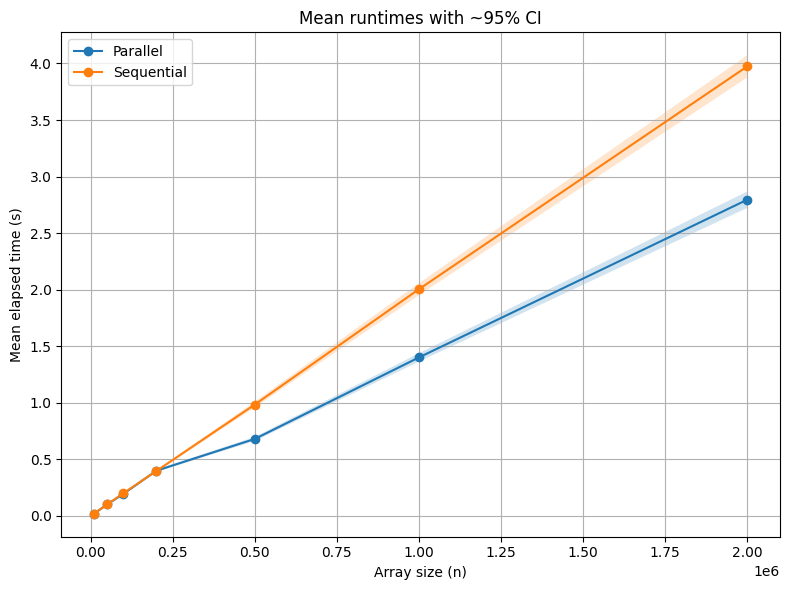

Saved: C:\Users\LENOVO\M2-SMPE-2025-HanaeTafza\quicksort\figures\quicksort_analysis.png


In [11]:
# Save a figure (CI plot)
fig_path = Path("figures") / "quicksort_analysis.png"
fig_path.parent.mkdir(parents=True, exist_ok=True)
plt.figure(figsize=(8,6))
for v in agg["version"].unique():
    sub = agg[agg["version"]==v].sort_values("array_size")
    plt.plot(sub["array_size"], sub["mean_time"], marker="o", label=v)
    plt.fill_between(sub["array_size"], sub["ci_low"], sub["ci_high"], alpha=0.2)
plt.xlabel("Array size (n)"); plt.ylabel("Mean elapsed time (s)")
plt.title("Mean runtimes with ~95% CI")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.savefig(fig_path, dpi=300); plt.show()
print("Saved:", fig_path.resolve())


In [12]:
# O(n log n) fit (simple linear regression on n*log2(n))
def nlogn(x):
    x = np.asarray(x, dtype=float)
    return x * np.log2(x)

results = []
for v in agg["version"].unique():
    sub = agg[agg["version"]==v].sort_values("array_size")
    X = np.vstack([np.ones(len(sub)), nlogn(sub["array_size"])]).T
    y = sub["mean_time"].values
    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    results.append((v, beta[0], beta[1]))
    print(f"{v:10s}: time ≈ {beta[0]:.4e} + {beta[1]:.4e} · n log2 n")


Parallel  : time ≈ 7.8013e-02 + 6.5279e-08 · n log2 n
Sequential: time ≈ 5.1748e-02 + 9.4662e-08 · n log2 n
